In [206]:
from pydriller import Repository
import datetime

repo = 'twill'
url = "E:\\MS\\Qtr1\\ecs 260 se\\project\\twill\\.git"

commits = list(Repository(url).traverse_commits())
no_of_commits = []
total_commits = []
i=0
delta = datetime.timedelta(weeks=4)
while i < len(commits):
#     print(commits[i].author_date)
    date1 = commits[i].author_date
    j = i+1
    while j<len(commits) and commits[j].author_date -date1 <= delta:
        j+=1
    if j>=len(commits):
        break
    date2 = commits[j].author_date
    date3 = commits[j-1].author_date
    total_commits.append(j)
    i = j+1
total_commits.append(j) 

no_of_commits = [0]+[total_commits[0]] +[total_commits[i] - total_commits[i-1] for i in range(1, len(total_commits))]
total_commits = [0] + total_commits

In [207]:
print(total_commits[-1])

293


In [208]:
from pydriller import Repository
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


steps = []
congruences = []
commits = list(Repository(url).traverse_commits())
delta = datetime.timedelta(weeks=4)
# step = int(len(commits)/100)
# for k in range(0,len(commits), step):
for k in range(0, len(no_of_commits)-1):
    i = 0
    file_to_users = {}  ## for each file how many users commited
    file_to_id = {}     ##
    tmp_commits = commits[total_commits[k]:total_commits[k+1]]
    print("reached till commits: ",total_commits[k])
#     if(len(tmp_commits)<step):
#         break
    for commit in tmp_commits:
        #print('The commit  has been modified by {} on {} and files changed are {}\n'.
              #format(commit.author.email,commit.committer_date,[x.filename for x in commit.modified_files]))
        
        
        for x in commit.modified_files:
            if x.filename not in file_to_users:
                file_to_users[x.filename] = set()
                file_to_users[x.filename].add(str(commit.author.email))
                if x.filename not in file_to_id:
                    file_to_id[x.filename] = i
                    i = i+1
            else:
                file_to_users[x.filename].add(str(commit.author.email))
                if x.filename not in file_to_id:
                    file_to_id[x.filename] = i
                    i = i+1


    ### Identifing unique users for each files
    unique_users_dict = {}
    unique_users = set()
    i = 0
    for x in file_to_users.keys():
        file_to_users[x] = list(file_to_users[x])
        for user in file_to_users[x]:
            if user not in unique_users_dict:
                unique_users_dict[user] = i
                i=i+1
            unique_users.add(user)


    ### Calculation of Actual Coordination - fct (file changed together)
    ## Assumption - 1 files - n developers have changed it. So they would have communicated at one point. 

    list_unique_users = unique_users
    AC = [[0]*len(list_unique_users) for x in range(0,len(list_unique_users))]

    for key in file_to_users.keys():
        users = file_to_users[key]
        for i in range(0, len(users)):
            for j in range(i+1,len(users)):
                AC[unique_users_dict[users[i]]][unique_users_dict[users[j]]] = 1
                AC[unique_users_dict[users[j]]][unique_users_dict[users[i]]] = 1


    ### Calculation of Coordination needs matrix: TA * TD * TAT

    CR = []
    TA = [[0]*len(file_to_users.keys()) for x in range(0,len(list_unique_users))]
    TD = [[0]*len(file_to_users.keys()) for x in range(0,len(file_to_users.keys()))]   
    ### TD - m * m; m = number of files TD[i][j] = ith file and jth file are dependent on each other.
    ### if in commit they are changed togteher they are dependent. So we have assumption of undirected graph.

    for key in file_to_users.keys():
        list_of_users = file_to_users[key]
        for x in list_of_users:
            TA[unique_users_dict[x]][file_to_id[key]] = 1 

    for commit in tmp_commits:
        modified_files_in_commit = commit.modified_files
        for i in range(0, len(modified_files_in_commit)):
            for j in range(i, len(modified_files_in_commit)):
                TD[file_to_id[modified_files_in_commit[i].filename]][file_to_id[modified_files_in_commit[j].filename]] = 1
                TD[file_to_id[modified_files_in_commit[j].filename]][file_to_id[modified_files_in_commit[i].filename]] = 1


    TA = pd.DataFrame(TA)
    TD = pd.DataFrame(TD)
    AC = pd.DataFrame(AC)
    
    CR = TA @ TD @ TA.T  
    
    CR_normalised = CR / CR.max(axis=0)
    diff =  (CR_normalised - AC)
    
    CR_count=0
    for i in range(0, len(CR_normalised)):
        for j in range(len(CR_normalised[0])):
            if CR_normalised[i][j] > 0:
                CR_count+=1
#     print("step:", step)
    print('CR_count:', CR_count)
    
    diff_count=0
    for i in range(0, len(diff)):
        for j in range(len(diff[0])):
            if diff[i][j] > 0:
                diff_count+=1
    print('diff_count:', diff_count)
    if CR_count!=0:
        congruence = diff_count / CR_count
        print('congruence:',congruence)
        congruences.append(congruence)
    else:
        congruences.append(0)

reached till commits:  0
CR_count: 9
diff_count: 3
congruence: 0.3333333333333333
reached till commits:  5
CR_count: 36
diff_count: 24
congruence: 0.6666666666666666
reached till commits:  28
CR_count: 8
diff_count: 4
congruence: 0.5
reached till commits:  45
CR_count: 12
diff_count: 4
congruence: 0.3333333333333333
reached till commits:  57
CR_count: 2
diff_count: 2
congruence: 1.0
reached till commits:  63
CR_count: 2
diff_count: 2
congruence: 1.0
reached till commits:  66
CR_count: 49
diff_count: 27
congruence: 0.5510204081632653
reached till commits:  87
CR_count: 2
diff_count: 2
congruence: 1.0
reached till commits:  96
CR_count: 3
diff_count: 3
congruence: 1.0
reached till commits:  101
CR_count: 2
diff_count: 2
congruence: 1.0
reached till commits:  104
CR_count: 4
diff_count: 2
congruence: 0.5
reached till commits:  112
CR_count: 2
diff_count: 2
congruence: 1.0
reached till commits:  118
CR_count: 6
diff_count: 4
congruence: 0.6666666666666666
reached till commits:  123
CR_coun

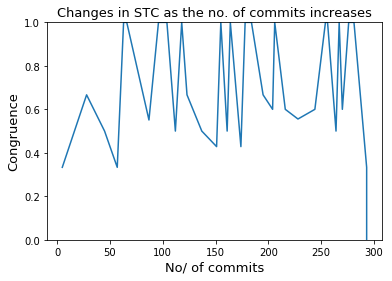

In [209]:
plt.plot(total_commits[1:], congruences)
plt.title("Changes in STC as the no. of commits increases", fontsize = 13)
plt.xlabel("No/ of commits", fontsize=13)
plt.ylabel("Congruence", fontsize = 13)
plt.ylim(0,1)
plt.savefig('images/'+repo+'.png')
plt.show()

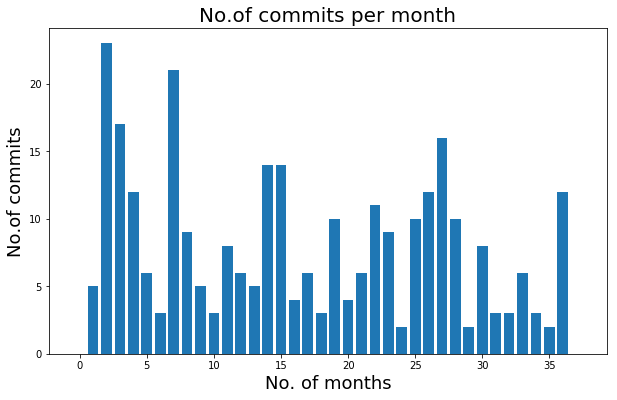

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[0, 5, 23, 17, 12, 6, 3, 21, 9, 5, 3, 8, 6, 5, 14, 14, 4, 6, 3, 10, 4, 6, 11, 9, 2, 10, 12, 16, 10, 2, 8, 3, 3, 6, 3, 2, 12, 0]


In [210]:
import matplotlib.pyplot as plt
x_axis1 = [0]
for i in range(1, len(no_of_commits)):
    x_axis1.append(x_axis1[i-1] + 1)


plt.figure(figsize =(10,6))
plt.bar(x_axis1, no_of_commits)
plt.xlabel("No. of months", fontsize =18)
plt.ylabel("No.of commits", fontsize =18)
plt.title("No.of commits per month" , fontsize =20)
plt.savefig('images/'+repo+'1.png')
plt.show()

print(x_axis1)
print(no_of_commits)

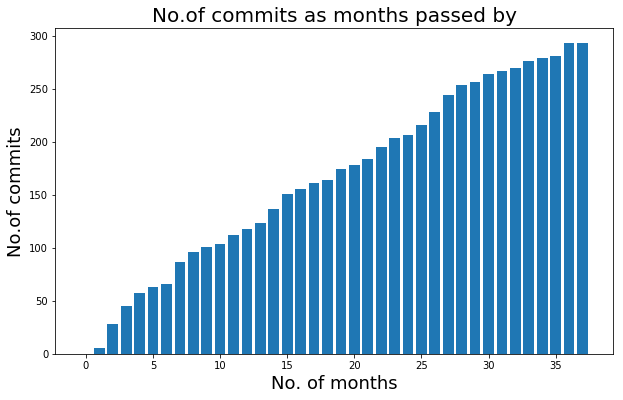

In [211]:
plt.figure(figsize =(10,6))
plt.bar(x_axis1, total_commits)
plt.xlabel("No. of months", fontsize =18)
plt.ylabel("No.of commits", fontsize =18)
plt.title("No.of commits as months passed by", fontsize = 20)
plt.savefig('images/'+repo+'2.png')
plt.show()

In [212]:
noofmonths = x_axis1[1:]
noofcommits = no_of_commits[1:]
print(len(noofcommits))
name = 'csv files/'+repo + '.csv'
dict = {'no_of_months': noofmonths, 'no_of_commits': noofcommits, 'congruences': congruences}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv(name) 

37
